In [0]:
import numpy as np
import matplotlib.pyplot as plt


class FFNetwork:
  
  def __init__(self,a):
    self.w1 = np.random.uniform(-a,a,1)
    self.w2 = np.random.uniform(-a,a,1)
    self.w3 = np.random.uniform(-a,a,1)
    self.w4 = np.random.uniform(-a,a,1)
    self.w5 = np.random.uniform(-a,a,1)
    self.w6 = np.random.uniform(-a,a,1)
    self.b1 = 0.1
    self.b2 = 0.1
    self.b3 = 0.1
    self.b4 = 0.1
    self.b5 = 0.1  
    self.b6 = 0.1 
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x = x
    self.a1 = self.w1*self.x + self.b1
   # print("a1 :",self.a1)
    self.h1 = self.sigmoid(self.a1)
   # print("h1 :",self.h1)
    self.a2 = self.w2*self.h1 + self.b2
   # print("a2 :",self.a2)
    self.h2 = self.sigmoid(self.a2)
   # print("h2 :",self.h2)
    self.a3 = self.w3*self.h2 + self.b3
   # print("a3 :",self.a3)
    self.h3 = self.sigmoid(self.a3)
   # print("h3 :",self.h3)
    self.a4 = self.w4*self.h3 + self.b4
   # print("a4 :",self.a4)
    self.h4 = self.sigmoid(self.a4)
   # print("h4 :",self.h4)
    self.a5 = self.w5*self.h4 + self.b5
   # print("a5 :",self.a5)
    self.h5 = self.sigmoid(self.a5)
   # print("h5  :",self.h5)
    return self.w6*self.h5+self.b6
  
  def grad(self, x):
   
    y = self.forward_pass(x)
    self.dw6 = self.h5
    self.dw5 = self.dw6*(self.h5)*(1-self.h5)*self.h4 
    self.dw4 = self.w5*(self.h4)*(1-self.h4)*self.h3 
    self.dw3 = self.w5*self.w4*(self.h3)*(1-self.h3)*self.h2
    self.dw2 = self.w5*self.w4*self.w3*(self.h2)*(1-self.h2)*self.h1
    self.dw1 = self.w5*self.w4*self.w3*self.w2*(self.h1)*(1-self.h1)*x
   
    self.db5 = (self.h5)*(1-self.h5) 
    self.db4 = self.w5*(self.h4)*(1-self.h4) 
    self.db3 = self.w5*self.w4*(self.h3)*(1-self.h3)
    self.db2 = self.w5*self.w4*self.w3*(self.h2)*(1-self.h2)
    self.db1 = self.w5*self.w4*self.w3*self.w2*(self.h1)*(1-self.h1)
    
    self.dx = self.w6*self.w5*self.w4*self.w3*self.w2*(self.h1)*(1-self.h1)*self.w1
    return y,self.dx
 
      
  

X -5   y   : [0.11471742]  dy   : [-8.55243749e-10]
X -4   y   : [0.11471742]  dy   : [-8.58232898e-10]
X -3   y   : [0.11471742]  dy   : [-8.60852425e-10]
X -2   y   : [0.11471742]  dy   : [-8.63097724e-10]
X -1   y   : [0.11471742]  dy   : [-8.64964829e-10]
X 0   y   : [0.11471742]  dy   : [-8.66450432e-10]
X 1   y   : [0.11471742]  dy   : [-8.67551891e-10]
X 2   y   : [0.11471742]  dy   : [-8.68267245e-10]
X 3   y   : [0.11471742]  dy   : [-8.68595217e-10]
X 4   y   : [0.11471742]  dy   : [-8.68535222e-10]
X 5   y   : [0.11471742]  dy   : [-8.68087366e-10]


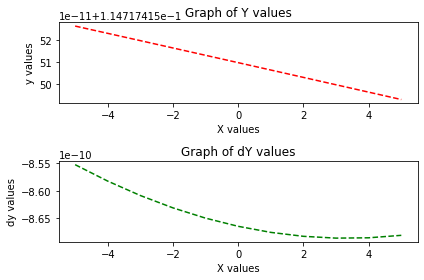

In [3]:
model = FFNetwork(0.1)
yvalues = []
dyvalues = []

for x in range(-5,6):
   
    y,dy = model.grad(x)
    yvalues.append(y)
    dyvalues.append(dy)
    print("X",x, "  y   :",y," dy   :",dy)
   
plt.figure()

plt.subplot(211)
plt.plot(np.arange(-5,6,1),yvalues,"r--")
plt.title("Graph of Y values")
plt.xlabel("X values")
plt.ylabel("y values")
plt.subplot(212)
plt.plot(np.arange(-5,6,1),dyvalues,"g--")
plt.title("Graph of dY values")
plt.xlabel("X values")
plt.ylabel("dy values")
plt.tight_layout()